# Capstone 2 - Baseball Stat Projections - Data Wrangling

In [536]:
#Import relevant libraries

import os
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime


In [537]:
path = "/Users/joeboardman/Documents/Springboard/Capstone 2/data/"
save_path = "/Users/joeboardman/Documents/Springboard/Capstone 2/"
print(path)

/Users/joeboardman/Documents/Springboard/Capstone 2/data/


In [538]:
#import csv files as dataframes with batting statistics and player information
os.chdir(path)
df = pd.read_csv('batting.csv')
df_player = pd.read_csv('player.csv')
df_salaries = pd.read_csv('salaries.csv')
df_position = pd.read_csv('appearances.csv')

In [539]:
#manipulate df_position so that it gives primary position per player, per year
print(df_position.shape)
df_position = df_position.iloc[:,[0,3,8,9,10,11,12,13,14,15,16,17,18]]
df_position['g_dh'] = df_position['g_dh'].fillna(0)
print(df_position.shape)
print(df_position.info())
print(df_position.head())

(100951, 21)
(100951, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100951 entries, 0 to 100950
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100951 non-null  int64  
 1   player_id  100951 non-null  object 
 2   g_p        100951 non-null  int64  
 3   g_c        100951 non-null  int64  
 4   g_1b       100951 non-null  int64  
 5   g_2b       100951 non-null  int64  
 6   g_3b       100951 non-null  int64  
 7   g_ss       100951 non-null  int64  
 8   g_lf       100951 non-null  int64  
 9   g_cf       100951 non-null  int64  
 10  g_rf       100951 non-null  int64  
 11  g_of       100951 non-null  int64  
 12  g_dh       100951 non-null  float64
dtypes: float64(1), int64(11), object(1)
memory usage: 10.0+ MB
None
   year  player_id  g_p  g_c  g_1b  g_2b  g_3b  g_ss  g_lf  g_cf  g_rf  g_of  \
0  1871  barnero01    0    0     0    16     0    15     0     0     0     0   
1  1871  barrofr01 

In [540]:
#remove duplicate years from position csv
df_position = df_position.groupby(['player_id', 'year']).sum().reset_index()
df_position

,player_id,year,g_p,g_c,g_1b,g_2b,g_3b,g_ss,g_lf,g_cf,g_rf,g_of,g_dh
0,aardsda01,2004,11,0,0,0,0,0,0,0,0,0,0.0
1,aardsda01,2006,45,0,0,0,0,0,0,0,0,0,0.0
2,aardsda01,2007,25,0,0,0,0,0,0,0,0,0,0.0
3,aardsda01,2008,47,0,0,0,0,0,0,0,0,0,0.0
4,aardsda01,2009,73,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93897,zwilldu01,1910,0,0,0,0,0,0,0,27,0,27,0.0
93898,zwilldu01,1914,0,0,0,0,0,0,0,153,1,154,0.0
93899,zwilldu01,1915,0,0,3,0,0,0,0,148,0,148,0.0
93900,zwilldu01,1916,0,0,0,0,0,0,0,5,4,10,0.0


In [541]:
#combine records where a player played for multiple teams into one record
#df = df.groupby(['player_id', 'year'])['team_id', 'g', 'ab', 'r', 'h', 'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf', 'g_idp'].sum().reset_index()
df = df.groupby(['player_id', 'year']).sum().reset_index()
print(df.head())
print(df.info())

   player_id  year  stint   g   ab    r    h  double  triple   hr  rbi   sb  \
0  aardsda01  2004      1  11  0.0  0.0  0.0     0.0     0.0  0.0  0.0  0.0   
1  aardsda01  2006      1  45  2.0  0.0  0.0     0.0     0.0  0.0  0.0  0.0   
2  aardsda01  2007      1  25  0.0  0.0  0.0     0.0     0.0  0.0  0.0  0.0   
3  aardsda01  2008      1  47  1.0  0.0  0.0     0.0     0.0  0.0  0.0  0.0   
4  aardsda01  2009      1  73  0.0  0.0  0.0     0.0     0.0  0.0  0.0  0.0   

    cs   bb   so  ibb  hbp   sh   sf  g_idp  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0    0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
3  0.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93898 entries, 0 to 93897
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  93898 non-null  object 
 1   year       9389

In [542]:
#merge batting and position csvs to avoid duplicate rows
df = pd.merge(df, df_position, on=['player_id', 'year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93882 entries, 0 to 93881
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  93882 non-null  object 
 1   year       93882 non-null  int64  
 2   stint      93882 non-null  int64  
 3   g          93882 non-null  int64  
 4   ab         93882 non-null  float64
 5   r          93882 non-null  float64
 6   h          93882 non-null  float64
 7   double     93882 non-null  float64
 8   triple     93882 non-null  float64
 9   hr         93882 non-null  float64
 10  rbi        93882 non-null  float64
 11  sb         93882 non-null  float64
 12  cs         93882 non-null  float64
 13  bb         93882 non-null  float64
 14  so         93882 non-null  float64
 15  ibb        93882 non-null  float64
 16  hbp        93882 non-null  float64
 17  sh         93882 non-null  float64
 18  sf         93882 non-null  float64
 19  g_idp      93882 non-null  float64
 20  g_p   

In [543]:
df_yr_stats = df.groupby('year')[['h', 'bb', 'hbp', 'ab', 'double', 'triple', 'hr', 'sf']].sum()
df_yr_stats['obp_lg'] = (df_yr_stats['h'] + df_yr_stats['bb'] + df_yr_stats['hbp']) / (df_yr_stats['ab'] + df_yr_stats['bb'] + df_yr_stats['hbp'] + df_yr_stats['sf'])
df_yr_stats['slg_lg'] = ((df_yr_stats['h'] - (df_yr_stats['double'] + df_yr_stats['triple'] + df_yr_stats['hr'])) + (df_yr_stats['double'] * 2) + (df_yr_stats['triple'] * 3) + (df_yr_stats['hr'] * 4)) / df_yr_stats['ab']
df_yr_stats['ops_lg'] = df_yr_stats['obp_lg'] + df_yr_stats['slg_lg']
df_yr_stats.tail(31).round(3)
df_yr_stats = df_yr_stats['ops_lg']

In [544]:
#merge dataframe to bring in player details, salaries etc.
#filter out seasons before 1985, anybody with more than 10 pitching appearances
df = pd.merge(df, df_player, on='player_id')
df = pd.merge(df, df_salaries, on=['player_id', 'year'])
df = df[df['year'] >= 1985]
df = df[df['ab'] >= 50]

col_list = ['g_c','g_1b','g_2b','g_3b','g_ss','g_lf','g_cf','g_rf','g_of','g_dh',]
df['pos_player_games'] = df[col_list].sum(axis=1)
df = df[df['pos_player_games'] > 0]
print(df.head(50))
print(df.info())

     player_id  year  stint    g     ab      r      h  double  triple    hr  \
15   abbotje01  1998      1   89  244.0   33.0   68.0    14.0     1.0  12.0   
16   abbotje01  1999      1   17   57.0    5.0    9.0     0.0     0.0   2.0   
17   abbotje01  2000      1   80  215.0   31.0   59.0    15.0     1.0   3.0   
28   abbotku01  1993      1   20   61.0   11.0   15.0     1.0     0.0   3.0   
29   abbotku01  1994      1  101  345.0   41.0   86.0    17.0     3.0   9.0   
30   abbotku01  1995      1  120  420.0   60.0  107.0    18.0     7.0  17.0   
31   abbotku01  1996      1  109  320.0   37.0   81.0    18.0     7.0   8.0   
32   abbotku01  1997      1   94  252.0   35.0   69.0    18.0     2.0   6.0   
33   abbotku01  1998      3   77  194.0   26.0   51.0    13.0     1.0   5.0   
34   abbotku01  1999      1   96  286.0   41.0   78.0    17.0     2.0   8.0   
35   abbotku01  2000      1   79  157.0   22.0   34.0     7.0     1.0   6.0   
46   abercre01  2006      1  111  255.0   39.0   54.

In [545]:
#Create datetime column with birthday to be able to calculate age
df['birth_date'] = pd.to_datetime((df.birth_year*10000+df.birth_month*100+df.birth_day).apply(str),format='%Y%m%d')

In [546]:
#calculate season number in a player's career and age
df['season'] = (df['year'] - pd.DatetimeIndex(df['debut']).year)
df['age'] = (df['year'] - pd.DatetimeIndex(df['birth_date']).year)
print(df.head())
print(df.info())

    player_id  year  stint    g     ab     r     h  double  triple    hr  ...  \
15  abbotje01  1998      1   89  244.0  33.0  68.0    14.0     1.0  12.0  ...   
16  abbotje01  1999      1   17   57.0   5.0   9.0     0.0     0.0   2.0  ...   
17  abbotje01  2000      1   80  215.0  31.0  59.0    15.0     1.0   3.0  ...   
28  abbotku01  1993      1   20   61.0  11.0  15.0     1.0     0.0   3.0  ...   
29  abbotku01  1994      1  101  345.0  41.0  86.0    17.0     3.0   9.0  ...   

    final_game  retro_id   bbref_id  team_id  league_id  salary  \
15  2001-09-29  abboj002  abbotje01      CHA         AL  175000   
16  2001-09-29  abboj002  abbotje01      CHA         AL  255000   
17  2001-09-29  abboj002  abbotje01      CHA         AL  255000   
28  2001-04-13  abbok002  abbotku01      OAK         AL  109000   
29  2001-04-13  abbok002  abbotku01      FLO         NL  109000   

    pos_player_games  birth_date  season  age  
15             161.0  1972-08-17       1   26  
16            

In [547]:
#calculate OPS, # of XBH
df['obp'] = (df['h'] + df['bb'] + df['hbp']) / (df['ab'] + df['bb'] + df['hbp'])
df['slg'] = ((df['h'] - (df['double'] + df['triple'] + df['hr'])) + (df['double'] * 2) + (df['triple'] * 3) + (df['hr'] * 4)) / df['ab']
df['ops'] = df['obp'] + df['slg']
print(df.head())

    player_id  year  stint    g     ab     r     h  double  triple    hr  ...  \
15  abbotje01  1998      1   89  244.0  33.0  68.0    14.0     1.0  12.0  ...   
16  abbotje01  1999      1   17   57.0   5.0   9.0     0.0     0.0   2.0  ...   
17  abbotje01  2000      1   80  215.0  31.0  59.0    15.0     1.0   3.0  ...   
28  abbotku01  1993      1   20   61.0  11.0  15.0     1.0     0.0   3.0  ...   
29  abbotku01  1994      1  101  345.0  41.0  86.0    17.0     3.0   9.0  ...   

    team_id  league_id  salary  pos_player_games  birth_date  season  age  \
15      CHA         AL  175000             161.0  1972-08-17       1   26   
16      CHA         AL  255000              34.0  1972-08-17       2   27   
17      CHA         AL  255000             136.0  1972-08-17       3   28   
28      OAK         AL  109000              34.0  1969-06-02       0   24   
29      FLO         NL  109000              99.0  1969-06-02       1   25   

         obp       slg       ops  
15  0.304348  0

In [548]:
#Delete unnecessary columns
df = df.drop(df.columns[[2,20,26,27,28,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,57,58]], axis=1)
df

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,g_3b,g_ss,g_of,g_dh,salary,season,age,obp,slg,ops
15,abbotje01,1998,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,...,0,0,76,0.0,175000,1,26,0.304348,0.491803,0.796151
16,abbotje01,1999,17,57.0,5.0,9.0,0.0,0.0,2.0,6.0,...,0,0,17,0.0,255000,2,27,0.225806,0.263158,0.488964
17,abbotje01,2000,80,215.0,31.0,59.0,15.0,1.0,3.0,29.0,...,0,0,65,2.0,255000,3,28,0.344538,0.395349,0.739887
28,abbotku01,1993,20,61.0,11.0,15.0,1.0,0.0,3.0,9.0,...,0,6,13,0.0,109000,0,24,0.281250,0.409836,0.691086
29,abbotku01,1994,101,345.0,41.0,86.0,17.0,3.0,9.0,33.0,...,0,99,0,0.0,109000,1,25,0.292350,0.394203,0.686553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24776,zuninmi01,2014,131,438.0,51.0,87.0,20.0,2.0,22.0,60.0,...,0,0,0,1.0,504100,1,23,0.256356,0.404110,0.660466
24777,zuninmi01,2015,112,350.0,28.0,61.0,11.0,0.0,11.0,28.0,...,0,0,0,0.0,523500,2,24,0.231383,0.300000,0.531383
24779,zupcibo01,1992,124,392.0,46.0,108.0,19.0,1.0,3.0,43.0,...,0,0,114,0.0,109000,1,26,0.325416,0.352041,0.677456
24780,zupcibo01,1993,141,286.0,40.0,69.0,24.0,2.0,2.0,26.0,...,0,0,122,0.0,222000,2,27,0.311111,0.360140,0.671251


In [549]:
#Fill NaN values in 'obp', 'slg', 'ops' columns with zeros because the errors are driven by a player 
#having 0 at bats for a season
dftest1 = df[df['obp'].isna()]
print(dftest1.head())
df['obp'] = df['obp'].fillna(0)
df['slg'] = df['slg'].fillna(0)
df['ops'] = df['ops'].fillna(0)
print(df.info())
print(df.head())

Empty DataFrame
Columns: [player_id, year, g, ab, r, h, double, triple, hr, rbi, sb, cs, bb, so, ibb, hbp, sh, sf, g_idp, g_c, g_1b, g_2b, g_3b, g_ss, g_of, g_dh, salary, season, age, obp, slg, ops]
Index: []

[0 rows x 32 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12365 entries, 15 to 24781
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  12365 non-null  object 
 1   year       12365 non-null  int64  
 2   g          12365 non-null  int64  
 3   ab         12365 non-null  float64
 4   r          12365 non-null  float64
 5   h          12365 non-null  float64
 6   double     12365 non-null  float64
 7   triple     12365 non-null  float64
 8   hr         12365 non-null  float64
 9   rbi        12365 non-null  float64
 10  sb         12365 non-null  float64
 11  cs         12365 non-null  float64
 12  bb         12365 non-null  float64
 13  so         12365 non-null  float64
 14  ibb        12

In [550]:
#check for duplicates
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,g_3b,g_ss,g_of,g_dh,salary,season,age,obp,slg,ops
6740,figgami01,1999,43,86.0,12.0,19.0,4.0,0.0,1.0,5.0,...,0,0,0,0.0,203650,2,29,0.238636,0.302326,0.540962
13603,maldoca01,1995,74,190.0,28.0,50.0,16.0,0.0,9.0,30.0,...,0,0,69,0.0,200000,14,35,0.375000,0.489474,0.864474
17402,perezro01,1998,69,141.0,12.0,31.0,2.0,0.0,3.0,14.0,...,0,0,46,0.0,215000,4,29,0.236111,0.297872,0.533983
21824,tatisfe01,1998,150,532.0,69.0,147.0,33.0,4.0,11.0,58.0,...,149,3,0,0.0,170000,1,23,0.329268,0.415414,0.744682


In [551]:
#Drop Duplicates
df.drop_duplicates(keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12361 entries, 15 to 24781
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  12361 non-null  object 
 1   year       12361 non-null  int64  
 2   g          12361 non-null  int64  
 3   ab         12361 non-null  float64
 4   r          12361 non-null  float64
 5   h          12361 non-null  float64
 6   double     12361 non-null  float64
 7   triple     12361 non-null  float64
 8   hr         12361 non-null  float64
 9   rbi        12361 non-null  float64
 10  sb         12361 non-null  float64
 11  cs         12361 non-null  float64
 12  bb         12361 non-null  float64
 13  so         12361 non-null  float64
 14  ibb        12361 non-null  float64
 15  hbp        12361 non-null  float64
 16  sh         12361 non-null  float64
 17  sf         12361 non-null  float64
 18  g_idp      12361 non-null  float64
 19  g_c        12361 non-null  int64  
 20  g_1b 

# Feature Engineering - Add Useful Features before modeling

In [552]:
# Create New Features - OPS vs league avg
df = df.merge(df_yr_stats, on='year')
df['ops_vs_lg_avg'] = df.ops - df.ops_lg
df.head()

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,g_of,g_dh,salary,season,age,obp,slg,ops,ops_lg,ops_vs_lg_avg
0,abbotje01,1998,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,...,76,0.0,175000,1,26,0.304348,0.491803,0.796151,0.755338,0.040813
1,abbotku01,1998,77,194.0,26.0,51.0,13.0,1.0,5.0,24.0,...,14,4.0,1000000,5,29,0.312500,0.417526,0.730026,0.755338,-0.025312
2,abreubo01,1998,151,497.0,68.0,155.0,29.0,6.0,17.0,74.0,...,146,0.0,180000,2,24,0.411360,0.496982,0.908342,0.755338,0.153004
3,alexama02,1998,108,264.0,34.0,60.0,10.0,1.0,5.0,25.0,...,1,2.0,425000,6,27,0.279152,0.329545,0.608697,0.755338,-0.146640
4,alfoned01,1998,144,557.0,94.0,155.0,28.0,2.0,17.0,78.0,...,0,0.0,1750000,3,25,0.356800,0.427289,0.784089,0.755338,0.028751


In [553]:
# Create new features - avg ops for age/yr of career - need to create -1, -2, -3 features against lg avg
df_season_ops = df.groupby('season')[['ops']].mean()
df_season_ops['season_ops'] = df_season_ops['ops']
df_season_ops.drop('ops', axis=1, inplace=True)
df = df.merge(df_season_ops, on='season')
df['ops_vs_season_avg'] = df.ops - df.season_ops
df = df.sort_values(['player_id', 'year']).reset_index(drop=True)
df

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,salary,season,age,obp,slg,ops,ops_lg,ops_vs_lg_avg,season_ops,ops_vs_season_avg
0,abbotje01,1998,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,...,175000,1,26,0.304348,0.491803,0.796151,0.755338,0.040813,0.700753,0.095398
1,abbotje01,1999,17,57.0,5.0,9.0,0.0,0.0,2.0,6.0,...,255000,2,27,0.225806,0.263158,0.488964,0.778393,-0.289429,0.711484,-0.222520
2,abbotje01,2000,80,215.0,31.0,59.0,15.0,1.0,3.0,29.0,...,255000,3,28,0.344538,0.395349,0.739887,0.782061,-0.042174,0.726564,0.013323
3,abbotku01,1993,20,61.0,11.0,15.0,1.0,0.0,3.0,9.0,...,109000,0,24,0.281250,0.409836,0.691086,0.735573,-0.044487,0.679199,0.011887
4,abbotku01,1994,101,345.0,41.0,86.0,17.0,3.0,9.0,33.0,...,109000,1,25,0.292350,0.394203,0.686553,0.763021,-0.076468,0.700753,-0.014200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12356,zuninmi01,2014,131,438.0,51.0,87.0,20.0,2.0,22.0,60.0,...,504100,1,23,0.256356,0.404110,0.660466,0.700275,-0.039810,0.700753,-0.040287
12357,zuninmi01,2015,112,350.0,28.0,61.0,11.0,0.0,11.0,28.0,...,523500,2,24,0.231383,0.300000,0.531383,0.721370,-0.189987,0.711484,-0.180101
12358,zupcibo01,1992,124,392.0,46.0,108.0,19.0,1.0,3.0,43.0,...,109000,1,26,0.325416,0.352041,0.677456,0.699629,-0.022173,0.700753,-0.023296
12359,zupcibo01,1993,141,286.0,40.0,69.0,24.0,2.0,2.0,26.0,...,222000,2,27,0.311111,0.360140,0.671251,0.735573,-0.064322,0.711484,-0.040233


In [554]:
# Create New Features - More advanced stat calcs - wOBA, wRAA
df['player_wOBA'] = ((0.69 * (df.bb - df.ibb)) + (0.719 * df.hbp) + (0.87 * (df.h - (df.double + df.triple + df.hr))) + \
              (1.217 * df.double) + (1.529 * df.triple) + (1.94 * df.hr)) / (df.ab + df.bb - df.ibb + \
                                                                             df.hbp + df.sf)
df = df.dropna()


In [555]:
# Create New Features - More advanced stat calcs - wOBA, wRAA
df_fgsabr = pd.read_csv('FanGraphs_Leaderboard.csv')
df_fgsabr = df_fgsabr[['Season', 'wOBA', 'wOBAScale']]
df = df.merge(df_fgsabr, left_on='year', right_on='Season')
df.rename(columns={'Season':'wOBA_year', 'wOBA': 'lg_wOBA', 'wOBAScale':'lg_wOBAScale'}, inplace=True)
df['pa'] = df.ab + df.bb + df.sh + df.sf + df.hbp
df['wRAA'] = ((df.player_wOBA - df.lg_wOBA) / df.lg_wOBAScale) * df.pa

In [556]:
# Create New Features - Add ratios

df['BABIP'] = (df.h - df.hr) / (df.ab - df.so - df.hr + df.sf)
df['avg'] = df.h / df.ab
df['bb%'] = df.bb / df.pa
df['k%'] = df.so / df.pa
df['XBA%'] = (df.double + df.triple + df.hr) / df.h
df['hr%'] = df.hr / df.h
df['iso'] = df['slg'] - df['avg']

df = df.drop(['obp', 'slg', 'pa', 'wOBA_year'], axis=1)
df


,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,lg_wOBAScale,pa,wRAA,BABIP,avg,bb%,k%,XBA%,hr%,iso
0,abbotje01,1998,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,...,1.197,260.0,-1.715703,0.267943,0.278689,0.034615,0.107692,0.397059,0.176471,0.213115
1,abbotku01,1998,77,194.0,26.0,51.0,13.0,1.0,5.0,24.0,...,1.197,212.0,-4.392482,0.330935,0.262887,0.056604,0.250000,0.372549,0.098039,0.154639
2,abreubo01,1998,151,497.0,68.0,155.0,29.0,6.0,17.0,74.0,...,1.197,589.0,22.712479,0.393162,0.311871,0.142615,0.225806,0.335484,0.109677,0.185111
3,alexama02,1998,108,264.0,34.0,60.0,10.0,1.0,5.0,25.0,...,1.197,289.0,-16.674504,0.283505,0.227273,0.062284,0.228374,0.266667,0.083333,0.102273
4,alfoned01,1998,144,557.0,94.0,155.0,28.0,2.0,17.0,78.0,...,1.197,630.0,2.395702,0.296137,0.278276,0.103175,0.122222,0.303226,0.109677,0.149013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12356,wynnema01,1987,98,188.0,17.0,47.0,8.0,2.0,2.0,24.0,...,1.206,213.0,-6.431233,0.300000,0.250000,0.093897,0.173709,0.255319,0.042553,0.095745
12357,youngge02,1987,71,274.0,44.0,88.0,9.0,2.0,1.0,15.0,...,1.206,303.0,1.618574,0.350806,0.321168,0.085809,0.089109,0.136364,0.011364,0.058394
12358,youngjo02,1987,69,91.0,9.0,23.0,3.0,0.0,3.0,11.0,...,1.206,98.0,-2.917081,0.263158,0.252747,0.051020,0.132653,0.260870,0.130435,0.131868
12359,youngmi01,1987,110,363.0,46.0,87.0,10.0,1.0,16.0,39.0,...,1.206,412.0,-4.102002,0.276265,0.239669,0.111650,0.220874,0.310345,0.183908,0.165289


In [557]:
# Create New Features - shift stats to prior years so model cant use current year stats to predict
# current year OPS
import time
start_time = time.time()

df = df.sort_values(['player_id', 'year']).reset_index(drop=True)

#1-year shift
df['ops_1'] = df.groupby('player_id')['ops'].shift(fill_value=0)
#df['h_1'] = df.groupby('player_id')['h'].shift(fill_value=0)
#df['double_1'] = df.groupby('player_id')['double'].shift(fill_value=0)
#df['triple_1'] = df.groupby('player_id')['triple'].shift(fill_value=0)
#df['hr_1'] = df.groupby('player_id')['hr'].shift(fill_value=0)
#df['bb_1'] = df.groupby('player_id')['bb'].shift(fill_value=0)
#df['ibb_1'] = df.groupby('player_id')['ibb'].shift(fill_value=0)
#df['hbp_1'] = df.groupby('player_id')['hbp'].shift(fill_value=0)
df['ops_vs_lg_avg_1'] = df.groupby('player_id')['ops_vs_lg_avg'].shift(fill_value=0)
#df['rbi_1'] = df.groupby('player_id')['rbi'].shift(fill_value=0)
#df['so_1'] = df.groupby('player_id')['so'].shift(fill_value=0)
#df['ab_1'] = df.groupby('player_id')['ab'].shift(fill_value=0)
#df['sb_1'] = df.groupby('player_id')['sb'].shift(fill_value=0)
#df['cs_1'] = df.groupby('player_id')['cs'].shift(fill_value=0)
#df['sh_1'] = df.groupby('player_id')['sh'].shift(fill_value=0)
#df['sf_1'] = df.groupby('player_id')['sf'].shift(fill_value=0)
#df['g_idp_1'] = df.groupby('player_id')['g_idp'].shift(fill_value=0)
df['ops_vs_season_avg_1'] = df.groupby('player_id')['ops_vs_season_avg'].shift(fill_value=0)
#df['player_wOBA_1'] = df.groupby('player_id')['player_wOBA'].shift(fill_value=0)
df['avg_1'] = df.groupby('player_id')['avg'].shift(fill_value=0)
df['bb%_1'] = df.groupby('player_id')['bb%'].shift(fill_value=0)
df['k%_1'] = df.groupby('player_id')['k%'].shift(fill_value=0)
df['XBA%_1'] = df.groupby('player_id')['XBA%'].shift(fill_value=0)
df['hr%_1'] = df.groupby('player_id')['hr%'].shift(fill_value=0)
df['iso_1'] = df.groupby('player_id')['iso'].shift(fill_value=0)
df['g_c_1'] = df.groupby('player_id')['g_c'].shift(fill_value=0)
df['g_1b_1'] = df.groupby('player_id')['g_1b'].shift(fill_value=0)
df['g_2b_1'] = df.groupby('player_id')['g_2b'].shift(fill_value=0)
df['g_ss_1'] = df.groupby('player_id')['g_ss'].shift(fill_value=0)
df['g_3b_1'] = df.groupby('player_id')['g_3b'].shift(fill_value=0)
df['g_of_1'] = df.groupby('player_id')['g_of'].shift(fill_value=0)
df['g_dh_1'] = df.groupby('player_id')['g_dh'].shift(fill_value=0)
df['wRAA_1'] = df.groupby('player_id')['wRAA'].shift(fill_value=0)
df['BABIP_1'] = df.groupby('player_id')['BABIP'].shift(fill_value=0)

# 2-year shift
df['ops_2'] = df.groupby('player_id')['ops'].shift(periods=2, fill_value=0)
#df['h_2'] = df.groupby('player_id')['h'].shift(periods=2, fill_value=0)
#df['double_2'] = df.groupby('player_id')['double'].shift(periods=2, fill_value=0)
#df['triple_2'] = df.groupby('player_id')['triple'].shift(periods=2, fill_value=0)
#df['hr_2'] = df.groupby('player_id')['hr'].shift(periods=2, fill_value=0)
#df['bb_2'] = df.groupby('player_id')['bb'].shift(periods=2, fill_value=0)
#df['ibb_2'] = df.groupby('player_id')['ibb'].shift(periods=2, fill_value=0)
#df['hbp_2'] = df.groupby('player_id')['hbp'].shift(periods=2, fill_value=0)
df['ops_vs_lg_avg_2'] = df.groupby('player_id')['ops_vs_lg_avg'].shift(periods=2, fill_value=0)
#df['rbi_2'] = df.groupby('player_id')['rbi'].shift(periods=2, fill_value=0)
#df['so_2'] = df.groupby('player_id')['so'].shift(periods=2, fill_value=0)
#df['ab_2'] = df.groupby('player_id')['ab'].shift(periods=2, fill_value=0)
#df['sb_2'] = df.groupby('player_id')['sb'].shift(periods=2, fill_value=0)
#df['cs_2'] = df.groupby('player_id')['cs'].shift(periods=2, fill_value=0)
#df['sh_2'] = df.groupby('player_id')['sh'].shift(periods=2, fill_value=0)
#df['sf_2'] = df.groupby('player_id')['sf'].shift(periods=2, fill_value=0)
#df['g_idp_2'] = df.groupby('player_id')['g_idp'].shift(periods=2, fill_value=0)
df['ops_vs_season_avg_2'] = df.groupby('player_id')['ops_vs_season_avg'].shift(periods=2, fill_value=0)
#df['player_wOBA_2'] = df.groupby('player_id')['player_wOBA'].shift(periods=2, fill_value=0)
df['avg_2'] = df.groupby('player_id')['avg'].shift(periods=2, fill_value=0)
df['bb%_2'] = df.groupby('player_id')['bb%'].shift(periods=2, fill_value=0)
df['k%_2'] = df.groupby('player_id')['k%'].shift(periods=2, fill_value=0)
df['XBA%_2'] = df.groupby('player_id')['XBA%'].shift(periods=2, fill_value=0)
df['hr%_2'] = df.groupby('player_id')['hr%'].shift(periods=2, fill_value=0)
df['iso_2'] = df.groupby('player_id')['iso'].shift(periods=2, fill_value=0)
df['wRAA_2'] = df.groupby('player_id')['wRAA'].shift(periods=2, fill_value=0)
df['BABIP_2'] = df.groupby('player_id')['BABIP'].shift(periods=2, fill_value=0)

# 3-year shift
df['ops_3'] = df.groupby('player_id')['ops'].shift(periods=3, fill_value=0)
#df['h_3'] = df.groupby('player_id')['h'].shift(periods=3, fill_value=0)
#df['double_3'] = df.groupby('player_id')['double'].shift(periods=3, fill_value=0)
#df['triple_3'] = df.groupby('player_id')['triple'].shift(periods=3, fill_value=0)
#df['hr_3'] = df.groupby('player_id')['hr'].shift(periods=3, fill_value=0)
#df['bb_3'] = df.groupby('player_id')['bb'].shift(periods=3, fill_value=0)
#df['ibb_3'] = df.groupby('player_id')['ibb'].shift(periods=3, fill_value=0)
#df['hbp_3'] = df.groupby('player_id')['hbp'].shift(periods=3, fill_value=0)
df['ops_vs_lg_avg_3'] = df.groupby('player_id')['ops_vs_lg_avg'].shift(periods=3, fill_value=0)
#df['rbi_3'] = df.groupby('player_id')['rbi'].shift(periods=3, fill_value=0)
#df['so_3'] = df.groupby('player_id')['so'].shift(periods=3, fill_value=0)
#df['ab_3'] = df.groupby('player_id')['ab'].shift(periods=3, fill_value=0)
#df['sb_3'] = df.groupby('player_id')['sb'].shift(periods=3, fill_value=0)
#df['cs_3'] = df.groupby('player_id')['cs'].shift(periods=3, fill_value=0)
#df['sh_3'] = df.groupby('player_id')['sh'].shift(periods=3, fill_value=0)
#df['sf_3'] = df.groupby('player_id')['sf'].shift(periods=3, fill_value=0)
#df['g_idp_3'] = df.groupby('player_id')['g_idp'].shift(periods=3, fill_value=0)
df['ops_vs_season_avg_3'] = df.groupby('player_id')['ops_vs_season_avg'].shift(periods=3, fill_value=0)
#df['player_wOBA_3'] = df.groupby('player_id')['player_wOBA'].shift(periods=3, fill_value=0)
df['avg_3'] = df.groupby('player_id')['avg'].shift(periods=3, fill_value=0)
df['bb%_3'] = df.groupby('player_id')['bb%'].shift(periods=3, fill_value=0)
df['k%_3'] = df.groupby('player_id')['k%'].shift(periods=3, fill_value=0)
df['XBA%_3'] = df.groupby('player_id')['XBA%'].shift(periods=3, fill_value=0)
df['hr%_3'] = df.groupby('player_id')['hr%'].shift(periods=3, fill_value=0)
df['iso_3'] = df.groupby('player_id')['iso'].shift(periods=3, fill_value=0)
df['wRAA_3'] = df.groupby('player_id')['wRAA'].shift(periods=3, fill_value=0)
df['BABIP_3'] = df.groupby('player_id')['BABIP'].shift(periods=3, fill_value=0)

end_time = time.time()
total_time = end_time - start_time
print('Run time:',total_time, 'seconds')

Run time: 22.27055811882019 seconds


In [558]:
# Create New Features - Abbreviated season last year?
#df['short_prev_season'] = np.where(df['ab_1'] < 130, 'y', 'n')
#df

In [559]:
#count unique values for each column
for column in df.columns:
    vals = df[column].nunique()
    print(column, vals)

player_id 2174
year 31
g 150
ab 645
r 146
h 227
double 59
triple 23
hr 64
rbi 157
sb 80
cs 29
bb 147
so 200
ibb 43
hbp 33
sh 29
sf 18
g_idp 34
g_c 151
g_1b 163
g_2b 163
g_3b 163
g_ss 164
g_of 163
g_dh 150
salary 2197
season 26
age 31
obp 7310
slg 8183
ops 12281
ops_lg 31
ops_vs_lg_avg 12320
season_ops 26
ops_vs_season_avg 12317
player_wOBA 12313
wOBA_year 31
lg_wOBA 21
lg_wOBAScale 28
pa 708
wRAA 12322
BABIP 5711
avg 6398
bb% 6870
k% 8074
XBA% 3117
hr% 2558
iso 9173
ops_1 10142
ops_vs_lg_avg_1 10161
ops_vs_season_avg_1 10159
avg_1 5903
bb%_1 6346
k%_1 7251
XBA%_1 3013
hr%_1 2509
iso_1 8128
g_c_1 150
g_1b_1 163
g_2b_1 163
g_ss_1 164
g_3b_1 163
g_of_1 163
g_dh_1 150
wRAA_1 10161
BABIP_1 5289
ops_2 8403
ops_vs_lg_avg_2 8412
ops_vs_season_avg_2 8412
avg_2 5305
bb%_2 5646
k%_2 6317
XBA%_2 2882
hr%_2 2425
iso_2 7030
wRAA_2 8412
BABIP_2 4757
ops_3 6939
ops_vs_lg_avg_3 6945
ops_vs_season_avg_3 6945
avg_3 4693
bb%_3 4933
k%_3 5473
XBA%_3 2713
hr%_3 2315
iso_3 5976
wRAA_3 6945
BABIP_3 4268


In [560]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12361.0,2000.158806,8.728859,1985.000000,1993.000000,2000.000000,2008.000000,2015.000000
g,12361.0,106.753984,38.770680,14.000000,77.000000,112.000000,141.000000,163.000000
ab,12361.0,346.280155,173.226439,50.000000,192.000000,347.000000,501.000000,716.000000
r,12361.0,47.477146,29.765393,0.000000,22.000000,43.000000,70.000000,152.000000
h,12361.0,92.656581,52.274392,4.000000,46.000000,90.000000,136.000000,262.000000
...,...,...,...,...,...,...,...,...
XBA%_3,12361.0,0.184960,0.177143,0.000000,0.000000,0.214286,0.343066,0.750000
hr%_3,12361.0,0.063177,0.077916,0.000000,0.000000,0.027027,0.114504,0.521739
iso_3,12361.0,0.087136,0.090474,0.000000,0.000000,0.078585,0.159218,0.537313
wRAA_3,12361.0,0.805578,11.895529,-44.786689,-3.061821,0.000000,0.105241,111.655328


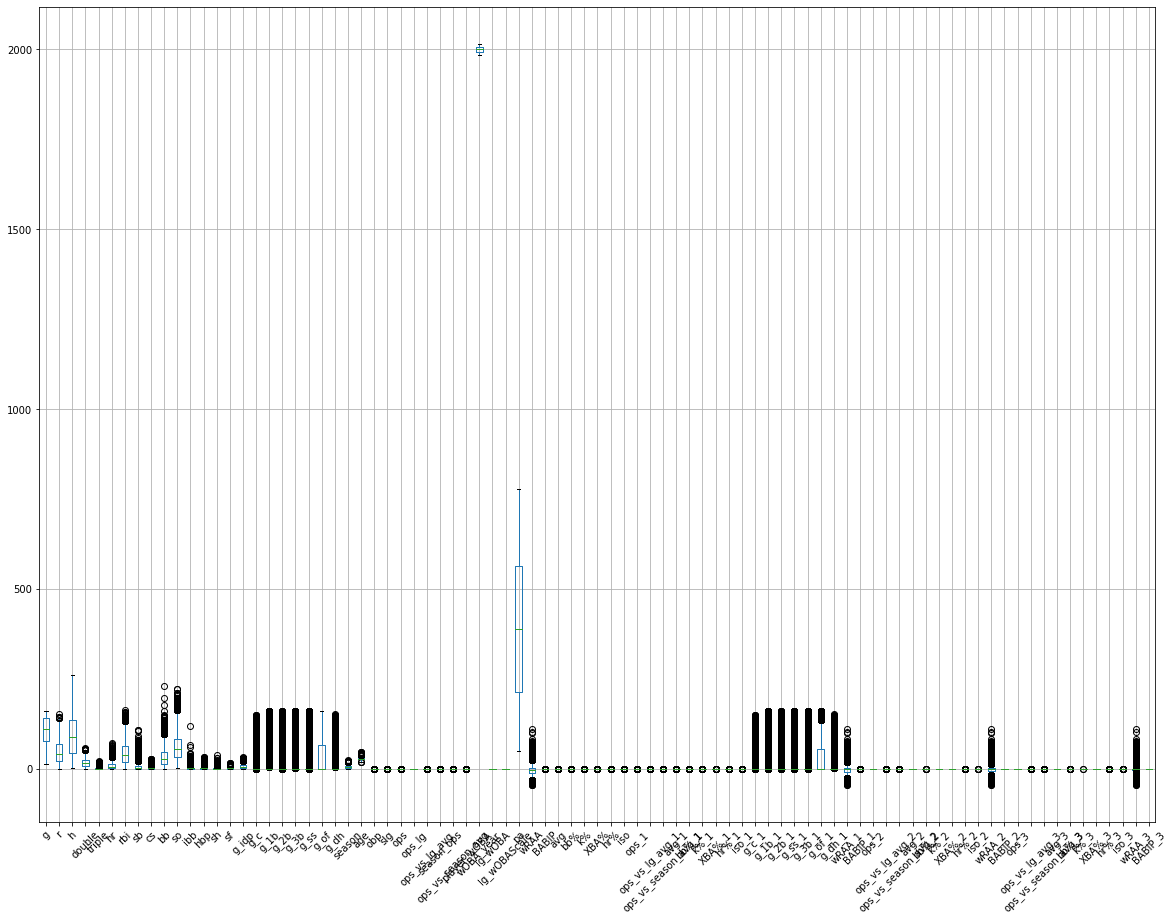

In [561]:
#Check for outliers
df_bp = df.drop(['salary', 'year','ab'], axis=1)
df_bp.boxplot(figsize=(20, 15), rot=45)

In [562]:
df.reset_index(inplace=True, drop=True)
df

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,ops_vs_lg_avg_3,ops_vs_season_avg_3,avg_3,bb%_3,k%_3,XBA%_3,hr%_3,iso_3,wRAA_3,BABIP_3
0,abbotje01,1998,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abbotje01,1999,17,57.0,5.0,9.0,0.0,0.0,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abbotje01,2000,80,215.0,31.0,59.0,15.0,1.0,3.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abbotku01,1993,20,61.0,11.0,15.0,1.0,0.0,3.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,abbotku01,1994,101,345.0,41.0,86.0,17.0,3.0,9.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12356,zuninmi01,2014,131,438.0,51.0,87.0,20.0,2.0,22.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12357,zuninmi01,2015,112,350.0,28.0,61.0,11.0,0.0,11.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12358,zupcibo01,1992,124,392.0,46.0,108.0,19.0,1.0,3.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12359,zupcibo01,1993,141,286.0,40.0,69.0,24.0,2.0,2.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [563]:
# Write your dataframe to csv 

save = os.path.join(save_path, 'data', 'Baseball_DW.csv')
df.to_csv(save)